In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DFS_parameter_impact.csv')  

In [3]:
data = pd.read_excel('DFS_parameter_impact.xlsx')

## 1. Descriptive statistical analysis:

In [36]:
# Extract metrics of interest
metrics_of_interest = ['Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']

# Descriptive statistical analysis:
desc_stats = df[metrics_of_interest].describe().transpose()
desc_stats

,count,mean,std,min,25%,50%,75%,max
Node number,45.0,2038.533333,207.477775,1643.000000,1847.000000,2008.000000,2234.000000,2336.000000
Edge number,45.0,14751.888889,722.840521,13230.000000,14122.000000,14762.000000,15419.000000,15696.000000
Coverage,45.0,0.943056,0.008259,0.914773,0.937500,0.943182,0.948864,0.954545
Avg. degree,45.0,14.550963,0.783764,13.438356,13.803939,14.639442,15.251237,16.104687
Runtime,45.0,932.632165,151.647433,684.011912,778.245591,964.976026,1072.315292,1181.285507


In [37]:
desc_stats.to_excel("DFS_desc_stats.xlsx")

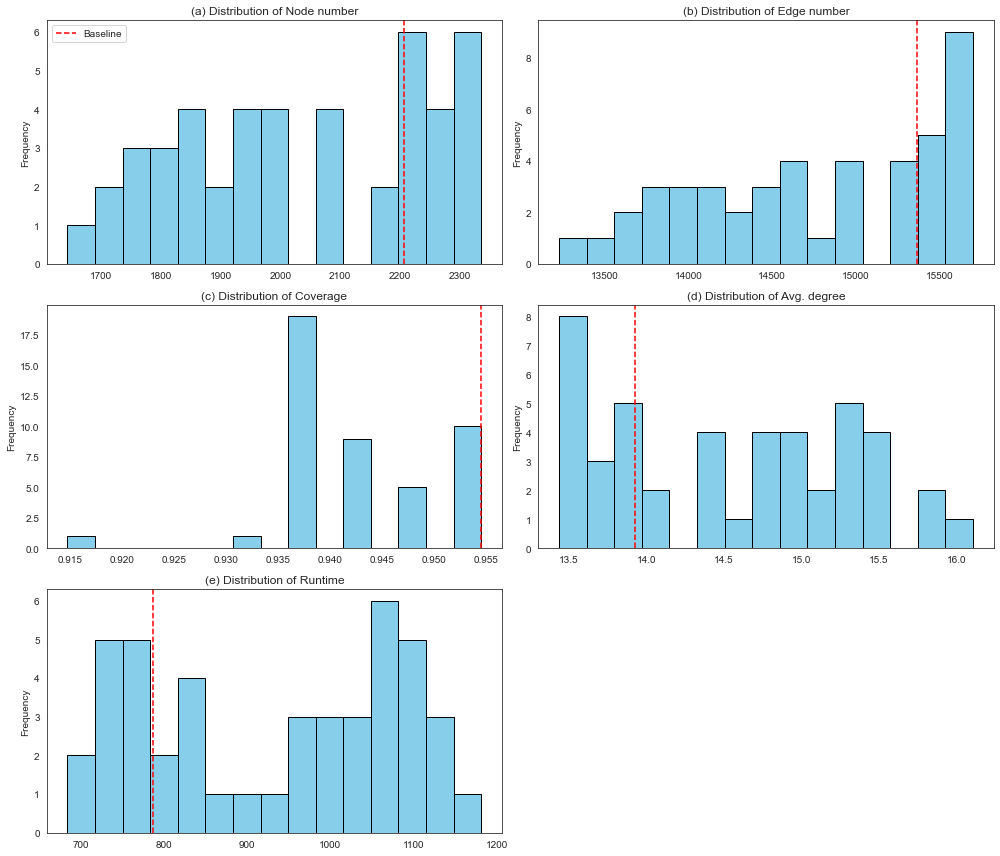

In [17]:
sns.set_style("white")

# Extract metrics columns for plotting
metrics_columns = ['Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

# Flatten axes and delete unused ones
axes[-1].axis('off')  # hide the last (empty) subplot

# Titles
titles = [
    "(a) Distribution of Node number",
    "(b) Distribution of Edge number",
    "(c) Distribution of Coverage",
    "(d) Distribution of Avg. degree",
    "(e) Distribution of Runtime"
]

# Iterate through metrics columns and plot the distributions
for i, col in enumerate(metrics_columns):
    ax = axes[i]
    ax.hist(data[col][2:], bins=15, color='skyblue', edgecolor='black')
    ax.axvline(x=data[col][1], color='red', linestyle='--', label='Baseline')
    ax.set_title(titles[i])
    ax.set_ylabel('Frequency')
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.savefig("DFS_result/png/distributions_of_evaluation_metrics_DFS.png")
plt.show()


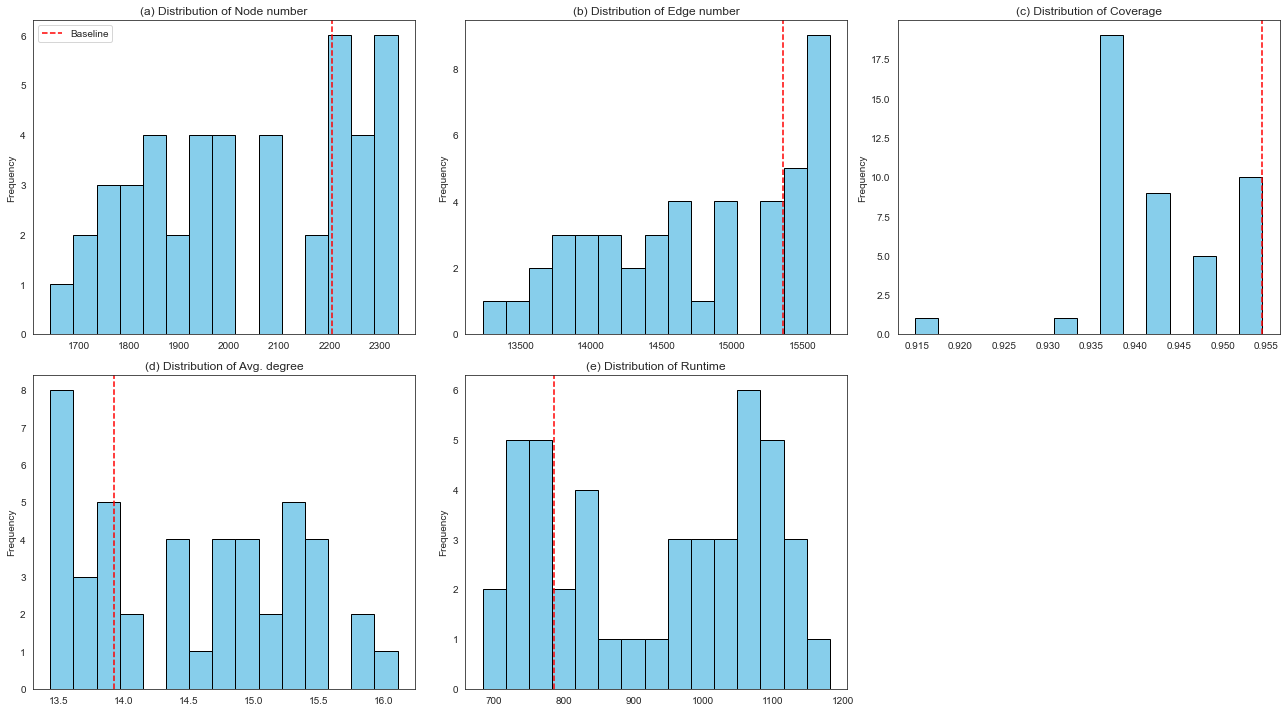

In [18]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Flatten axes and delete unused ones
axes[-1].axis('off')  # hide the last (empty) subplot

# Titles
titles = [
    "(a) Distribution of Node number",
    "(b) Distribution of Edge number",
    "(c) Distribution of Coverage",
    "(d) Distribution of Avg. degree",
    "(e) Distribution of Runtime"
]

# Iterate through metrics columns and plot the distributions
for i, col in enumerate(metrics_columns):
    ax = axes.flatten()[i]
    ax.hist(data[col][2:], bins=15, color='skyblue', edgecolor='black')
    ax.axvline(x=data[col][1], color='red', linestyle='--', label='Baseline')
    ax.set_title(titles[i])
    ax.set_ylabel('Frequency')
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.savefig("DFS_result/png/distributions_of_evaluation_metrics_DFS_ppt.png")
plt.show()


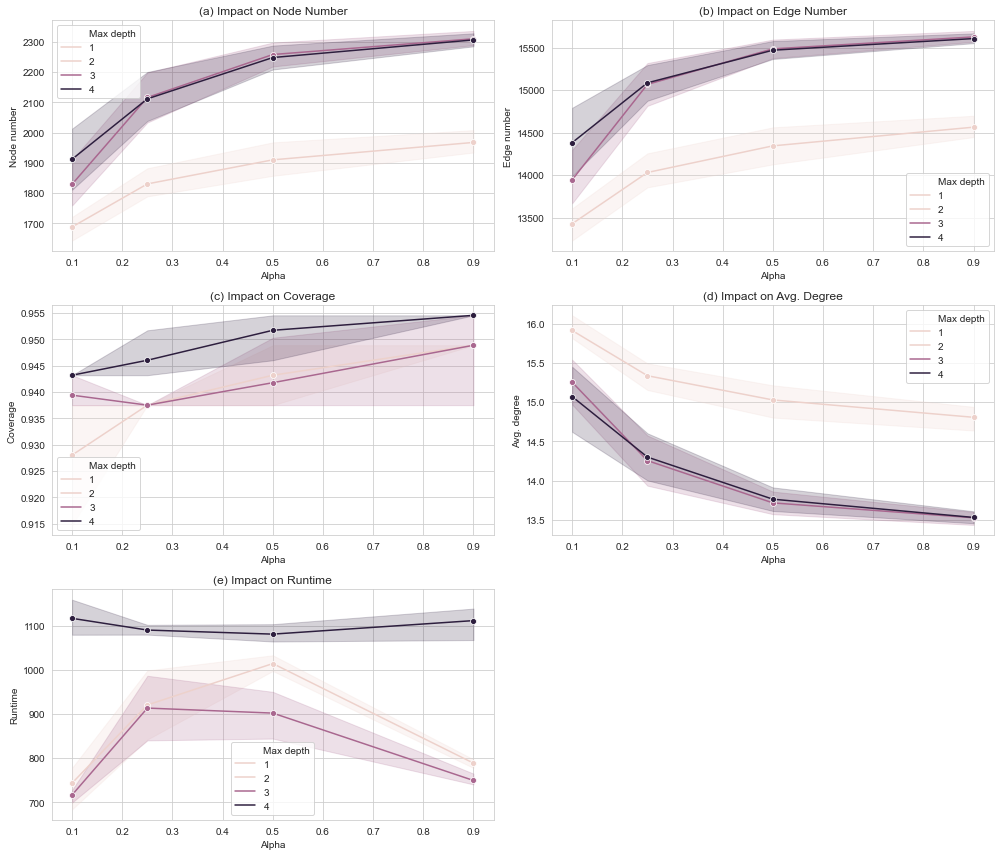

In [10]:
# Setup the aesthetic styles for the plots
sns.set_style("whitegrid")

# Extract the relevant data for analysis (excluding the first two rows: original and baseline)
analysis_data = data.iloc[2:].copy()

# Convert columns to proper data types for analysis
analysis_data["Alpha"] = pd.to_numeric(analysis_data["Alpha"], errors='coerce')
analysis_data["Beta"] = pd.to_numeric(analysis_data["Beta"], errors='coerce')
analysis_data["Max depth"] = pd.to_numeric(analysis_data["Max depth"], errors='coerce')

# Create a 3x2 grid of subplots to include Runtime vs. Alpha plot
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Flatten axs and delete (hide) unused ones
axs = axs.flatten()
axs[-1].axis('off')  # hide the last (empty) subplot

# Plot 1: Node number vs. Alpha, hue = Max depth
sns.lineplot(data=analysis_data, x="Alpha", y="Node number", hue="Max depth", marker="o", ax=axs[0])
axs[0].set_title("(a) Impact on Node Number")

# Plot 2: Edge number vs. Alpha, hue = Max depth
sns.lineplot(data=analysis_data, x="Alpha", y="Edge number", hue="Max depth", marker="o", ax=axs[1])
axs[1].set_title("(b) Impact on Edge Number")

# Plot 3: Coverage vs. Alpha, hue = Max depth
sns.lineplot(data=analysis_data, x="Alpha", y="Coverage", hue="Max depth", marker="o", ax=axs[2])
axs[2].set_title("(c) Impact on Coverage")

# Plot 4: Avg. degree vs. Alpha, hue = Max depth
sns.lineplot(data=analysis_data, x="Alpha", y="Avg. degree", hue="Max depth", marker="o", ax=axs[3])
axs[3].set_title("(d) Impact on Avg. Degree")

# Plot 5: Runtime vs. Alpha, hue = Max depth
sns.lineplot(data=analysis_data, x="Alpha", y="Runtime", hue="Max depth", marker="o", ax=axs[4])
axs[4].set_title("(e) Impact on Runtime")

# Adjust layout and save
plt.tight_layout()
plt.savefig("DFS_result/png/The Parameter Impact on Evaluation Metrics (with DFS).png")
plt.show()

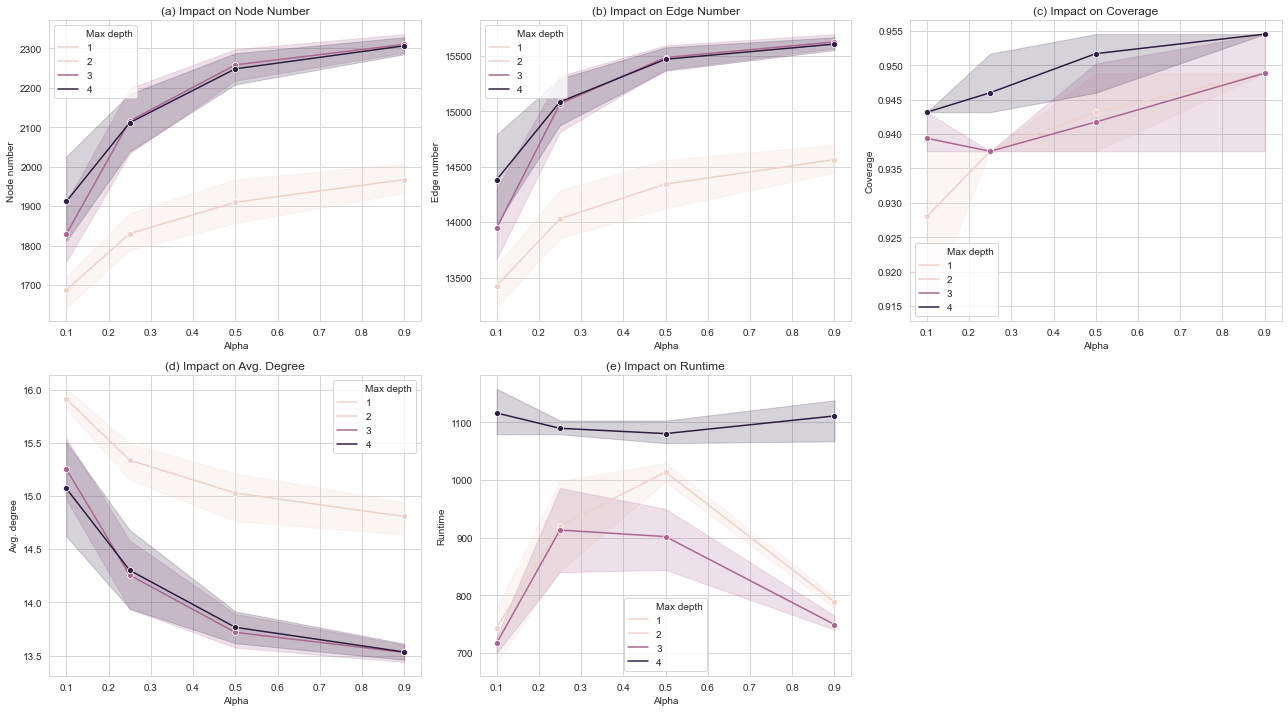

In [9]:
# Setup the aesthetic styles for the plots
sns.set_style("whitegrid")

# Extract the relevant data for analysis (excluding the first two rows: original and baseline)
analysis_data = data.iloc[2:].copy()

# Convert columns to proper data types for analysis
analysis_data["Alpha"] = pd.to_numeric(analysis_data["Alpha"], errors='coerce')
analysis_data["Beta"] = pd.to_numeric(analysis_data["Beta"], errors='coerce')
analysis_data["Max depth"] = pd.to_numeric(analysis_data["Max depth"], errors='coerce')

# Create a 3x2 grid of subplots to include Runtime vs. Alpha plot
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Flatten axs and delete (hide) unused ones
axs = axs.flatten()
axs[-1].axis('off')  # hide the last (empty) subplot

# Plot 1: Node number vs. Alpha, hue = Max depth
sns.lineplot(data=analysis_data, x="Alpha", y="Node number", hue="Max depth", marker="o", ax=axs[0])
axs[0].set_title("(a) Impact on Node Number")

# Plot 2: Edge number vs. Alpha, hue = Max depth
sns.lineplot(data=analysis_data, x="Alpha", y="Edge number", hue="Max depth", marker="o", ax=axs[1])
axs[1].set_title("(b) Impact on Edge Number")

# Plot 3: Coverage vs. Alpha, hue = Max depth
sns.lineplot(data=analysis_data, x="Alpha", y="Coverage", hue="Max depth", marker="o", ax=axs[2])
axs[2].set_title("(c) Impact on Coverage")

# Plot 4: Avg. degree vs. Alpha, hue = Max depth
sns.lineplot(data=analysis_data, x="Alpha", y="Avg. degree", hue="Max depth", marker="o", ax=axs[3])
axs[3].set_title("(d) Impact on Avg. Degree")

# Plot 5: Runtime vs. Alpha, hue = Max depth
sns.lineplot(data=analysis_data, x="Alpha", y="Runtime", hue="Max depth", marker="o", ax=axs[4])
axs[4].set_title("(e) Impact on Runtime")

# Adjust layout and save
plt.tight_layout()
plt.savefig("DFS_result/png/The Parameter Impact on Evaluation Metrics ppt(with DFS).png")
plt.show()

## 2. Similarity Analysis: Use Spearman's rank correlation coefficient 

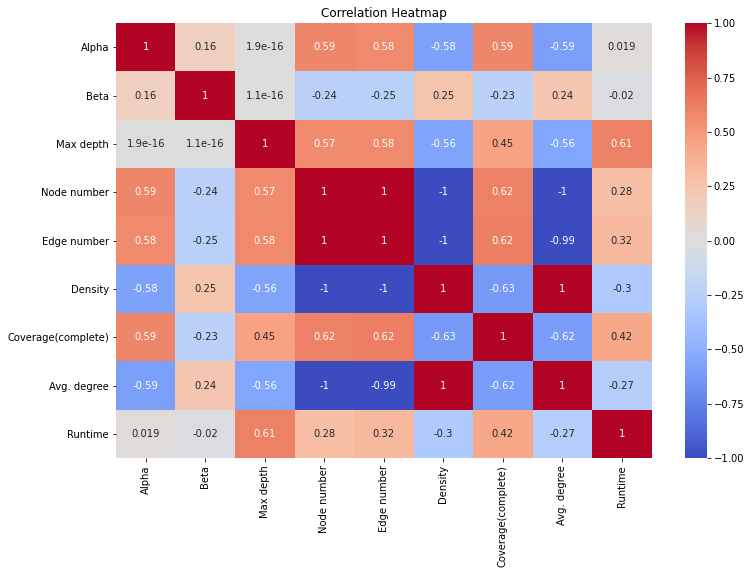

In [3]:
# Select the variables of interest
variables_of_interest = ['Alpha', 'Beta', 'Max depth', 'Node number', 'Edge number', 'Density', 'Coverage(complete)', 'Avg. degree', 'Runtime']

# Compute the correlation matrix
correlation_matrix = df[variables_of_interest].corr()

# Use heatmap to show correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

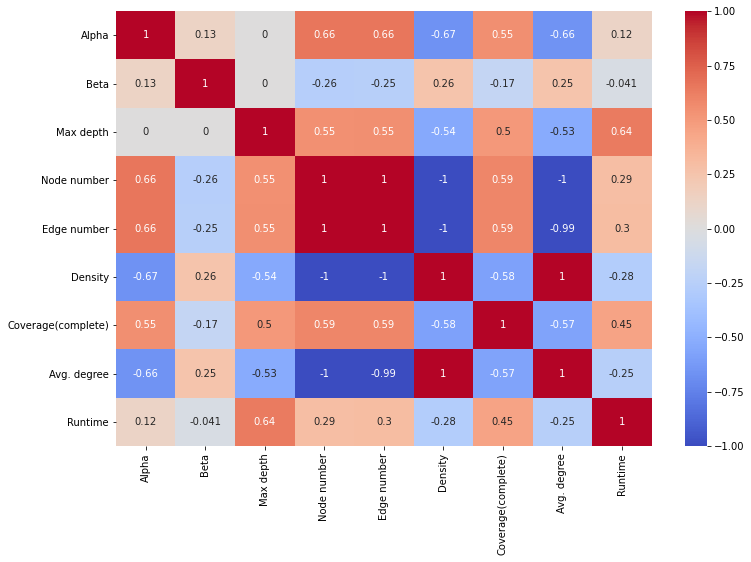

In [4]:
variables_of_interest = ['Alpha', 'Beta', 'Max depth', 'Node number', 'Edge number', 'Density', 'Coverage(complete)', 'Avg. degree', 'Runtime']

# Calculate the Spearman's rank correlation matrix
correlation_matrix_spearman = df[variables_of_interest].corr(method='spearman')

# Use heatmap to show Spearman correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#plt.title('Spearman Correlation Heatmap')
plt.show()


In [5]:
import os

In [19]:
# Create a directory to hold the images, if the directory does not exist
if not os.path.exists("heatmaps"):
    os.mkdir("heatmaps")

parameters = ['Alpha', 'Beta', 'Max depth']

for param in parameters:
    variables_of_interest = [param, 'Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']
    
    # Calculate the Spearman's rank correlation matrix
    correlation_matrix_spearman = df[variables_of_interest].corr(method='spearman')

    # Use heatmap to show Spearman correlation
    plt.figure(figsize=(11, 6))
    sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    #plt.title(f'Spearman Correlation Heatmap for {param}')
    
    # adjust the layout
    plt.tight_layout()
    plt.subplots_adjust(left=0.15)  # Adjust left margin

    # save the image
    plt.savefig(f"heatmaps/spearman_correlation_{param}.png")
    plt.close()  # # Close the current graph to prevent repeated display


## 3. Multiple regression analysis

### Use model: OLS

In [20]:
import statsmodels.api as sm

In [21]:
# Create interaction items for Alpha, Beta, Max depth
df['Alpha_Beta'] = df['Alpha'] * df['Beta']
df['Alpha_Max_depth'] = df['Alpha'] * df['Max depth']
df['Beta_Max_depth'] = df['Beta'] * df['Max depth']

# Create list of evaluation metrics
metrics = ['Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']

# Build a multiple regression model for each evaluation metric and their interaction terms
model_summaries = {}
for metric in metrics:
    X = df[['Alpha', 'Beta', 'Max depth', 'Alpha_Beta', 'Alpha_Max_depth', 'Beta_Max_depth']]
    X = sm.add_constant(X)  # Add constant items
    y = df[metric]
    model = sm.OLS(y, X).fit()
    model_summaries[metric] = model.summary()

model_summaries['Node number']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Node number   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     25.03
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           8.66e-12
Time:                        23:36:49   Log-Likelihood:                -267.43
No. Observations:                  45   AIC:                             548.9
Df Residuals:                      38   BIC:                             561.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1669.9526    168.377      9.918      0.000    1329.091    2010.814
Alpha              63.0650    252.994      0.249      0.804    -449.094     575.224
Beta             -2.01e+04   2.27e+04     -0.885      0.382   -6.61e+04    2.59e+04
Max depth         130.2153     51.353      2.536      0.015      26.256     234.175
Alpha_Beta       1.695e+04   2.18e+04      0.776      0.443   -2.73e+04    6.12e+04
Alpha_Max_depth    92.6327     64.544      1.435      0.159     -38.030     223.295
Beta_Max_depth  -3946.5498   6851.008     -0.576      0.568   -1.78e+04    9922.590
==============================================================================
Omnibus:                        3.138   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                2.868
Skew:                           0.544   Prob(JB):                        0.238
Kurtosis:                       2.412   Cond. No.                     6.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model_summaries['Edge number']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Edge number   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     23.91
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           1.70e-11
Time:                        23:36:49   Log-Likelihood:                -324.41
No. Observations:                  45   AIC:                             662.8
Df Residuals:                      38   BIC:                             675.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.346e+04    597.366     22.537      0.000    1.23e+04    1.47e+04
Alpha             621.2002    897.568      0.692      0.493   -1195.831    2438.232
Beta            -1.088e+05   8.06e+04     -1.350      0.185   -2.72e+05    5.44e+04
Max depth         483.6999    182.191      2.655      0.012     114.873     852.526
Alpha_Beta       8.227e+04   7.75e+04      1.062      0.295   -7.46e+04    2.39e+05
Alpha_Max_depth   122.1621    228.989      0.533      0.597    -341.402     585.726
Beta_Max_depth  -4324.9992   2.43e+04     -0.178      0.860   -5.35e+04    4.49e+04
==============================================================================
Omnibus:                        3.212   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                2.764
Skew:                           0.505   Prob(JB):                        0.251
Kurtosis:                       2.327   Cond. No.                     6.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model_summaries['Coverage']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Coverage   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     14.53
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           1.54e-08
Time:                        23:36:49   Log-Likelihood:                 179.32
No. Observations:                  45   AIC:                            -344.6
Df Residuals:                      38   BIC:                            -332.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.9263      0.008    112.727      0.000       0.910       0.943
Alpha               0.0398      0.012      3.225      0.003       0.015       0.065
Beta               -1.4810      1.108     -1.336      0.189      -3.725       0.763
Max depth           0.0043      0.003      1.716      0.094      -0.001       0.009
Alpha_Beta         -1.2343      1.066     -1.158      0.254      -3.392       0.923
Alpha_Max_depth    -0.0043      0.003     -1.352      0.184      -0.011       0.002
Beta_Max_depth      0.3041      0.334      0.909      0.369      -0.373       0.981
==============================================================================
Omnibus:                        4.183   Durbin-Watson:                   2.644
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                3.054
Skew:                          -0.593   Prob(JB):                        0.217
Kurtosis:                       3.471   Cond. No.                     6.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model_summaries['Avg. degree']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Avg. degree   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     24.23
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           1.40e-11
Time:                        23:36:49   Log-Likelihood:                -16.970
No. Observations:                  45   AIC:                             47.94
Df Residuals:                      38   BIC:                             60.59
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              15.9103      0.644     24.693      0.000      14.606      17.215
Alpha              -0.1916      0.968     -0.198      0.844      -2.151       1.768
Beta               75.0758     86.910      0.864      0.393    -100.864     251.016
Max depth          -0.4827      0.197     -2.456      0.019      -0.881      -0.085
Alpha_Beta        -66.8012     83.566     -0.799      0.429    -235.971     102.369
Alpha_Max_depth    -0.3618      0.247     -1.465      0.151      -0.862       0.138
Beta_Max_depth     15.6351     26.216      0.596      0.554     -37.437      68.707
==============================================================================
Omnibus:                        2.566   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                2.379
Skew:                          -0.490   Prob(JB):                        0.304
Kurtosis:                       2.445   Cond. No.                     6.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model_summaries['Runtime']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Runtime   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     4.025
Date:                Sun, 13 Aug 2023   Prob (F-statistic):            0.00323
Time:                        23:36:49   Log-Likelihood:                -278.25
No. Observations:                  45   AIC:                             570.5
Df Residuals:                      38   BIC:                             583.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             482.8085    214.126      2.255      0.030      49.333     916.284
Alpha             212.1599    321.733      0.659      0.514    -439.155     863.475
Beta             1.265e+04   2.89e+04      0.438      0.664   -4.58e+04    7.11e+04
Max depth         134.4671     65.306      2.059      0.046       2.261     266.673
Alpha_Beta      -2.054e+04   2.78e+04     -0.739      0.464   -7.68e+04    3.57e+04
Alpha_Max_depth   -18.4750     82.081     -0.225      0.823    -184.640     147.690
Beta_Max_depth  -2189.7854   8712.468     -0.251      0.803   -1.98e+04    1.54e+04
==============================================================================
Omnibus:                        0.894   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.945
Skew:                          -0.227   Prob(JB):                        0.623
Kurtosis:                       2.454   Cond. No.                     6.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Use model: Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Create interaction items for Alpha, Beta, Max depth
df['Alpha_Beta'] = df['Alpha'] * df['Beta']
df['Alpha_Max_depth'] = df['Alpha'] * df['Max depth']
df['Beta_Max_depth'] = df['Beta'] * df['Max depth']

# define independent and dependent variables
X = df[['Alpha', 'Beta', 'Max depth', 'Alpha_Beta', 'Alpha_Max_depth', 'Beta_Max_depth']]

# Set list of evaluation metrics
metrics = ['Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']
# Set empty result dictionary
results = {}

for metric in metrics:
    y = df[metric]
    
    # Splitting data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Evaluate model
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store values for MSE and Feature importances into result dictionary
    feature_importances = rf.feature_importances_
    #importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    #feature_importance_dict[metric] = importance_df.sort_values(by='Importance', ascending=False)
    results[metric] = {
        'MAE': mae,
        'Feature Importances': feature_importances
    }

#Reorganize the result DataFrame    
data = {
    'MAE': [results[metric]['MAE'] for metric in metrics],
    'Alpha': [results[metric]['Feature Importances'][0] for metric in metrics],
    'Beta': [results[metric]['Feature Importances'][1] for metric in metrics],
    'Max depth': [results[metric]['Feature Importances'][2] for metric in metrics],
    'Alpha_Beta': [results[metric]['Feature Importances'][3] for metric in metrics],
    'Alpha_Max_depth': [results[metric]['Feature Importances'][4] for metric in metrics],
    'Beta_Max_depth': [results[metric]['Feature Importances'][5] for metric in metrics],
}

df_results = pd.DataFrame(data, index=metrics)
df_results_transposed = df_results.T

# Export to CSV
df_results_transposed.to_csv("RF_Results for multiple regression analysis_DFS.csv", index=False)

print(df_results_transposed)


                 Node number  Edge number  Coverage  Avg. degree    Runtime
MAE                31.653333    88.070000  0.004653     0.123119  31.413875
Alpha               0.056834     0.046086  0.048721     0.051744   0.087009
Beta                0.063066     0.058470  0.046614     0.067530   0.016252
Max depth           0.269549     0.263588  0.096454     0.259466   0.532608
Alpha_Beta          0.053142     0.060484  0.055143     0.054911   0.139455
Alpha_Max_depth     0.515461     0.532665  0.644793     0.525730   0.207704
Beta_Max_depth      0.041948     0.038708  0.108275     0.040619   0.016973


## 4. Parameter optimization

### Use model: OLS

In [27]:
import pandas as pd
from pyswarm import pso
import statsmodels.api as sm

In [16]:
# load data
df = pd.read_csv("DFS_parameter_impact.csv")

# Refit the model using OLS
X = df[['Alpha', 'Beta', 'Max depth']]
X = sm.add_constant(X)

model_node_num = sm.OLS(df['Node number'], X).fit()
model_edge_num = sm.OLS(df['Edge number'], X).fit()
model_coverage = sm.OLS(df['Coverage'], X).fit()
model_avg_degree = sm.OLS(df['Avg. degree'], X).fit()
model_runtime = sm.OLS(df['Runtime'], X).fit()

# Define the optimization objective function
def objective_function(params):
    alpha, beta, max_depth = params
    
    # Use the OLS model to make predictions
    predictors = pd.DataFrame([[1, alpha, beta, max_depth]], columns=['const', 'Alpha', 'Beta', 'Max depth'])
    
    predicted_node_num = model_node_num.predict(predictors)
    predicted_edge_num = model_edge_num.predict(predictors)
    predicted_coverage = model_coverage.predict(predictors)
    predicted_avg_degree = model_avg_degree.predict(predictors)
    predicted_runtime = model_runtime.predict(predictors)
    
    # Define weights 
    w1, w2, w3, w4, w5 = -0.000001, -0.0000001, 1, 0.1, -0.0001
    
    # Calculate the objective function value
    objective = (w1 * predicted_node_num +
                 w2 * predicted_edge_num +
                 w3 * predicted_coverage +
                 w4 * predicted_avg_degree +
                 w5 * predicted_runtime)
    
    return -objective.values[0]  # Note: We want to maximize the objective function, but PSO is a minimization algorithm, so we take negative values

# Define the parameter range
lb = [0.1, 0.0025, 2]  # The lower bound of the parameter
ub = [0.9, 0.01, 4]   # The upper bound of the parameter

# run PSO
best_params, _ = pso(objective_function, lb, ub, swarmsize=100, maxiter=100)

print("The best parameter combination is:")
print("Alpha:", best_params[0])
print("Beta:", best_params[1])
print("Max depth:", best_params[2])

Stopping search: maximum iterations reached --> 100
The best parameter combination is:
Alpha: 0.1
Beta: 0.01
Max depth: 2.0


### Use model: Random Forest

In [4]:
df = pd.read_csv('DFS_parameter_impact.csv')  

In [5]:
# Define the evaluation metrics to be normalized
metrics = ['Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']

# Normalized
for metric in metrics:
    df[metric] = (df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())

df.to_csv("DFS_parameter_impact_normalized.csv", index=False)

df.head()  

,Alpha,Beta,Max depth,Node number,Edge number,Density,Coverage,Avg. degree,Runtime
0,0.1,0.0025,2,0.243867,0.285888,0.004246,0.571429,0.728506,0.167070
1,0.1,0.0025,3,0.626263,0.696269,0.003466,0.571429,0.357989,0.084032
2,0.1,0.0025,4,0.642136,0.723844,0.003446,0.714286,0.353980,1.000000
3,0.1,0.0050,2,0.112554,0.153285,0.004597,0.571429,0.891002,0.169613
4,0.1,0.0050,3,0.385281,0.432279,0.003921,0.571429,0.574301,0.077867


In [25]:
# Define independent
X = df[['Alpha', 'Beta', 'Max depth']]

# Store the trained random forest model
rf_models = {}

metrics_list = ['Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']

for metric in metrics_list:
    y = df[metric]
    
    # Train random forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # Save model
    rf_models[metric] = rf

In [22]:
# 定义优化的目标函数
def objective_function(params):
    alpha, beta, max_depth = params
    
    #Use random forest model to predict various evaluation metrics
    predictions = [model.predict([[alpha, beta, max_depth]])[0] for model in rf_models.values()]
    
    # Define weights
    weights = [-0.000001, -0.0000001, 1, 0.1, -0.0001] #The weights for unnormalized metric values
    
    # Calculate total score
    score = sum([pred * weight for pred, weight in zip(predictions, weights)])
    
    return -score  # Take a negative value here, because PSO is the minimization objective function

# Define the parameter range
lb = [0.1, 0.0025, 2]  # The lower bound of the parameter
ub = [0.9, 0.01, 10]   # The upper bound of the parameter

# Use PSO for optimization
best_params, _ = pso(objective_function, lb, ub, swarmsize=100, maxiter=100)

print("The best parameter combination is:")
print(f"Alpha: {best_params[0]}, Beta: {best_params[1]}, Max depth: {round(best_params[2])}")


Stopping search: maximum iterations reached --> 100
The best parameter combination is:
Alpha: 0.1, Beta: 0.009317177390643095, Max depth: 2


## Creat subgraph using the optimal parameter combination

In [24]:
from rdflib import Graph, URIRef, Literal, Namespace
import networkx as nx
import pandas as pd
import time

In [25]:
from main import *
from sa_helper import *

In [26]:
# Load the graph from the input file
graph = Graph()
graph.parse('aifb_fixed_complete.nt', format="nt") #graph.parse(input_file, format=format)

<Graph identifier=Na73813b971d345ba9e6b3930f389cc4b (<class 'rdflib.graph.Graph'>)>

In [27]:
G = nx.DiGraph()  # Create a directed graph

for s, p, o in graph:
    G.add_edge(s, o, predicate=p)

In [28]:
# Count the neighbor node number for each nodes in the graph
neighbor_counts = {node: len(list(G.neighbors(node))) for node in G.nodes()}

In [29]:
# load training and testing entities
train_df = pd.read_csv('trainingSet.tsv', sep='\t')
test_df = pd.read_csv('testSet.tsv', sep='\t')
complete_df = pd.read_csv('completeDataset.tsv', sep='\t')

train_seed_entities = train_df['person'].tolist() 
test_seed_entities = test_df['person'].tolist()
complete_seed_entities = complete_df['person'].tolist()

### Calculate the performance of the optimal parameter combination

In [32]:
# Initialize the resulting DataFrame
columns = ['Alpha', 'Beta', 'Max depth', 'Node number', 'Edge number', 'Density', 'Coverage(train)', 
           'Coverage(complete)', 'Avg. degree', 'Runtime']
results_df_op = pd.DataFrame(columns=columns)

alpha = 0.1
beta = 0.009
max_depth = 2

start_time = time.time()

subgraph = spreading_activation_DFS(graph, G, train_seed_entities, neighbor_counts, 
                                    alpha, beta, max_depth, extraction_threshold=0,
                                    fan_out=True, excl=True, pop=True)
G_sub = nx.DiGraph()  # Create a directed graph for the subgraph

for s, p, o in subgraph:
    G_sub.add_edge(s, o, predicate=p)

#Exhibihate the size of subgraph: The number of nodes and edges in the subgraph.
num_nodes = len(G_sub.nodes())
num_edges = len(G_sub.edges())

#Exhibihate the density of subgraph: The ratio of the number of edges to the number of nodes in the subgraph.
density = num_edges / (num_nodes * (num_nodes - 1)) if num_nodes > 1 else 0

#Exhibihate the coverage(only train_seed_entities): Percentage of the seed entities that are included in the subgraph.
seed_entities_in_subgraph = [entity for entity in train_seed_entities if URIRef(entity) in G_sub.nodes()]
coverage_train = len(seed_entities_in_subgraph) / len(train_seed_entities)

#Exhibihate the coverage(complete_seed_entities): Percentage of the seed entities that are included in AIFB.
seed_entities_in_subgraph = [entity for entity in complete_seed_entities if URIRef(entity) in G_sub.nodes()]
coverage_complete = len(seed_entities_in_subgraph) / len(complete_seed_entities)

#Exhibihate the Relevance: How many of the nodes and edges in the subgraph are relevant
avg_degree = sum(dict(G_sub.degree()).values()) / num_nodes if num_nodes != 0 else 0

end_time = time.time()
runtime = end_time - start_time

# Add results to DataFrame
results_df_op = results_df_op.append({
    'Alpha': alpha,
    'Beta': beta,
    'Max depth': max_depth,
    'Node number': num_nodes,
    'Edge number': num_edges,
    'Density': density,
    'Coverage(train)': coverage_train,
    'Coverage(complete)': coverage_complete,
    'Avg. degree': avg_degree,
    'Runtime': runtime
}, ignore_index=True)
                
# Export to CSV
results_df_op.to_csv("Performance of optimal parameter combination_1.csv", index=False)

print(results_df_op)   

   Alpha   Beta  Max depth  Node number  Edge number  Density  \
0    0.1  0.009        2.0       1658.0      13242.0  0.00482   

   Coverage(train)  Coverage(complete)  Avg. degree     Runtime  
0              1.0            0.920455    15.973462  692.535174  


## 5. Visualization for the performance of the optimal parameter combination

In [5]:
import matplotlib.pyplot as plt

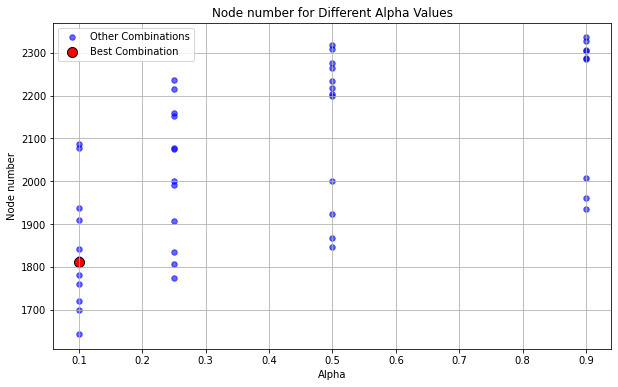

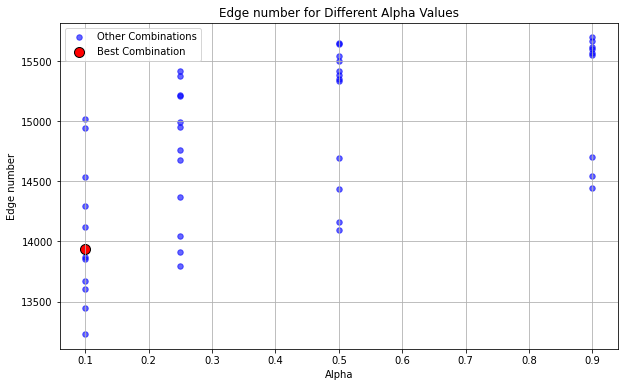

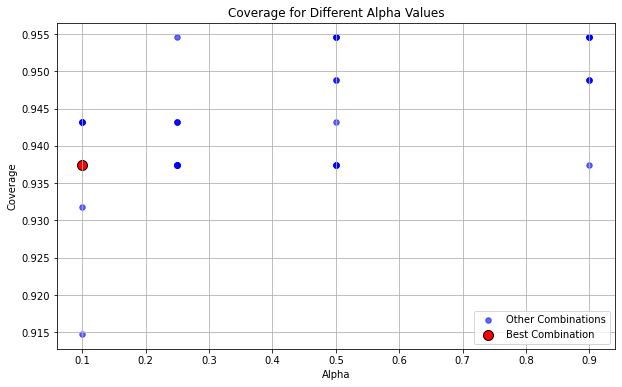

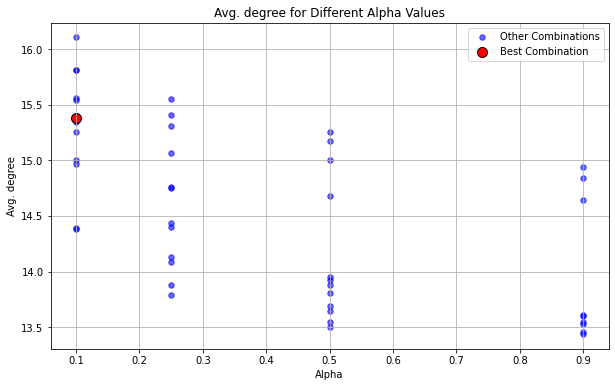

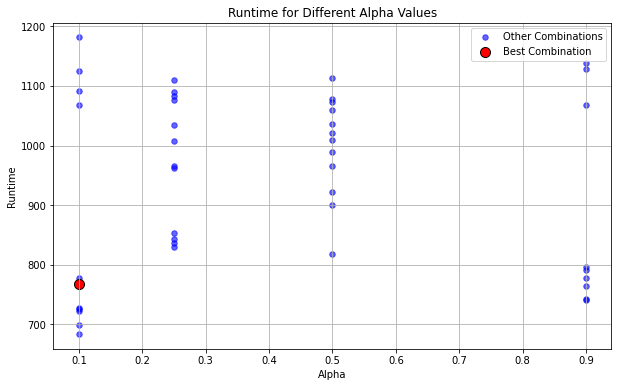

In [6]:
# The best combination of parameters
best_alpha, best_beta, best_max_depth = 0.1, 0.01, 2.0

# List of evaluation metrics
metrics = ['Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']

# Visualize each evaluation metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # plot all parameter combinations
    plt.scatter(df['Alpha'], df[metric], label='Other Combinations', color='blue', s=30, alpha=0.6)
    
    # Highlight the best combination of parameters
    plt.scatter(best_alpha, df[df['Alpha'] == best_alpha][metric].values[0], label='Best Combination', color='red', s=100, edgecolors='black')
    
    plt.title(f'{metric} for Different Alpha Values')
    plt.xlabel('Alpha')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

In [8]:
import numpy as np

In [33]:
df_op = pd.read_csv('Performance of optimal parameter combination.csv')  

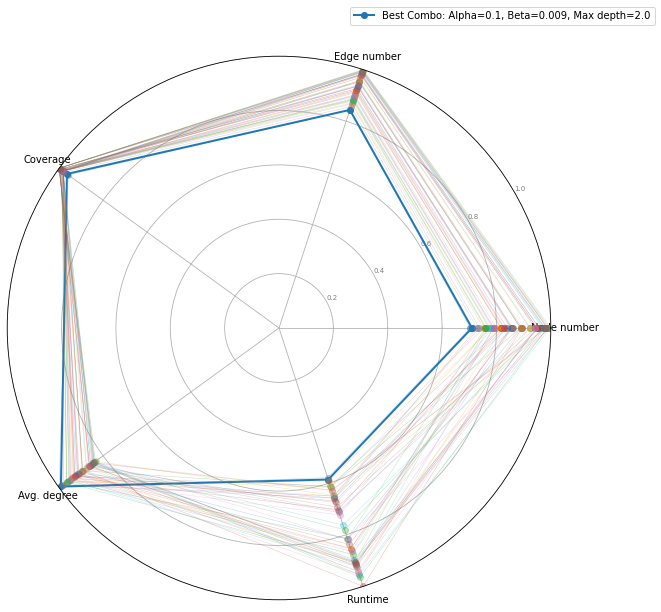

In [35]:
# List of evaluation metrics
metrics = ['Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']

# Get the maximum value of the evaluation index
max_values = df_op[metrics].max().values

# Data normalization
df_op_normalized = df_op[metrics] / max_values

# Set the axes of the radar/spider chart
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Close chart

# Set the graph size
fig = plt.figure(figsize=(11, 10))
ax = fig.add_subplot(111, polar=True)

# Plot the data
for i, row in df_op.iterrows():
    values = df_op_normalized.iloc[i].values.flatten().tolist()
    values += values[:1]  # Close chart
    if row['Alpha'] == 0.1 and row['Beta'] == 0.009 and row['Max depth'] == 2.0:  # Set the optimal parameter combination
        ax.plot(angles, values, 'o-', linewidth=2, label=f"Best Combo: Alpha={row['Alpha']}, Beta={row['Beta']}, Max depth={row['Max depth']}")
    else:
        ax.plot(angles, values, 'o-', linewidth=0.5, alpha=0.3)

# Add axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_rlabel_position(30)  # Set the position of the value labels
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=7)
plt.ylim(0, 1)

# Set legend 
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
#plt.title("Performance of Parameter Combinations")
plt.savefig("New Performance of Parameter Combinations.png")
plt.show()

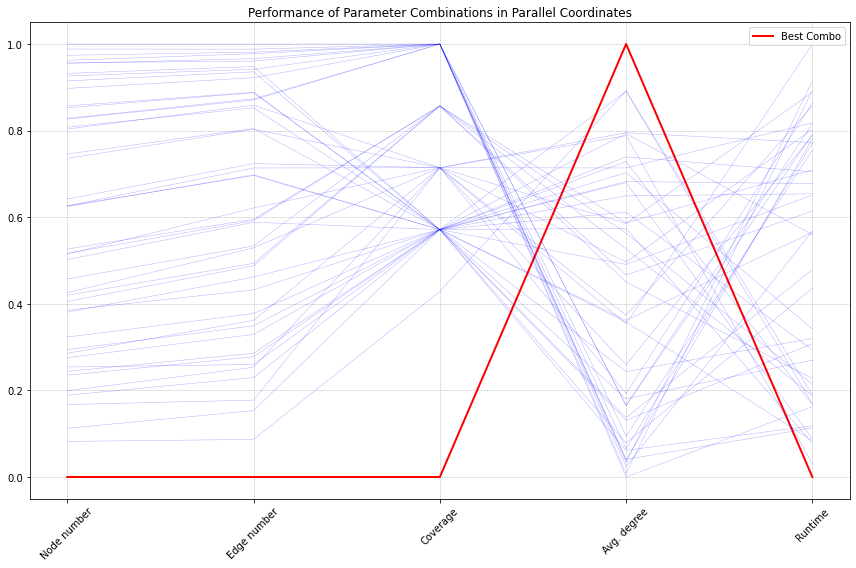

In [14]:
# List of evaluation metrics
cols = ['Node number', 'Edge number', 'Coverage', 'Avg. degree', 'Runtime']

# Normalize the data so that all metrics will be on the same scale
df_normalized = df.copy()
df_normalized[cols] = (df[cols] - df[cols].min()) / (df[cols].max() - df[cols].min())

# Add a column to mark the best combination
df_normalized['is_best'] = (df['Alpha'] == 0.1) & (df['Beta'] == 0.01) & (df['Max depth'] == 2.0)

# draw a parallel coordinates plot
plt.figure(figsize=(12, 8))
for i, row in df_normalized.iterrows():
    if row['is_best']:
        plt.plot(cols, row[cols], color='red', label='Best Combo', linewidth=2)
    else:
        plt.plot(cols, row[cols], color='blue', alpha=0.3, linewidth=0.5)

# set axis labels and title
plt.xticks(rotation=45)
plt.title("Performance of Parameter Combinations in Parallel Coordinates")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig("Performance of Parameter Combinations_1.png")
plt.show()